Accuracy :  0.8947368421052632 Precision :  0.9090909090909091 Recall : 0.8333333333333334


Text(0.5,1,'Validation accuracy')

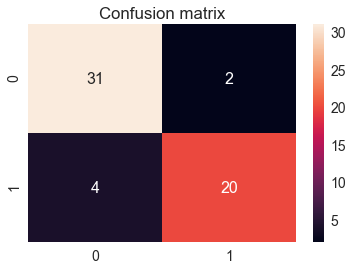

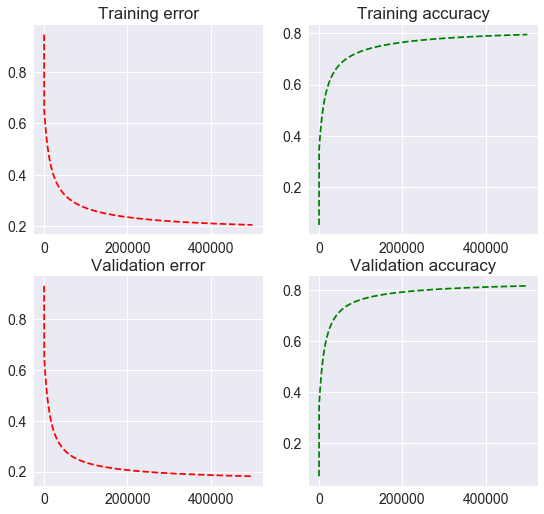

In [3]:
#------------------------------------------------------------------------------------------------------------------------------
#Project 1 : Logistic Regression Implementation
#------------------------------------------------------------------------------------------------------------------------------
#Name : Nanditha Nandanavanam
#UB Number : 50318504
#------------------------------------------------------------------------------------------------------------------------------
#Code
#------------------------------------------------------------------------------------------------------------------------------
#libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

#Read dataset using panda
dataset = pd.read_csv("wdbc.dataset", header = None)

#Split into x and y
dataset_y = dataset.iloc[:,1]
dataset_x = dataset.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]

#Convert M and B into 1 or 0 in dataset y
dataset_y = np.where(dataset_y == "M",1,0)

#Split dataset into 80% training, 10% validation, 10% testing
X_train , X_temp, Y_train , Y_temp = train_test_split(dataset_x , dataset_y , test_size = 0.2, random_state = 2)
X_test , X_val, Y_test , Y_val = train_test_split(X_temp , Y_temp , test_size = 0.5, random_state = 2)

#Normalisation of datasets
X_train = preprocessing.normalize(X_train)
X_val = preprocessing.normalize(X_val)
X_test = preprocessing.normalize(X_test)

#Reshape output datsets
Y_train = (Y_train.reshape(Y_train.shape[0],1)).transpose()
Y_val = (Y_val.reshape(Y_val.shape[0],1)).transpose()
Y_test = (Y_test.reshape(Y_test.shape[0],1)).transpose()

#Initilaise model parameters
theta = np.zeros(30)
theta = theta.reshape(30,1)
bias = 1

#Initialise hyper parameters
learning_rate = 0.05
no_of_epochs = 500000

#Initilaise arrays that store loss function of traning and validation datasets for every epoch
epoch_number = np.zeros(no_of_epochs)
Loss_func_train = np.zeros(no_of_epochs)
Loss_func_val = np.zeros(no_of_epochs)

for epoch in range(no_of_epochs):
    #Compute sigmoid function
    zeta = np.dot(theta.transpose(), X_train.transpose()) + bias
    hypothesis = 1.0 / (1.0+np.exp(-zeta))
    
    #Compute Loss for training
    Loss_func_train[epoch] = -(Y_train * np.log(hypothesis) + (1-Y_train) *np.log(1-hypothesis)).mean()
    
    #Compute gradient
    gradient = np.dot(X_train.transpose(), (hypothesis-Y_train).transpose())/ Y_train.shape[1]
    
    #Update weights and bias as per learning rate and gradient
    theta = theta - (learning_rate * gradient)
    bias = bias - (learning_rate * (hypothesis-Y_train).mean())

    #Compute hypothesis and Loss for validation dataset
    zeta_val = np.dot(theta.transpose(), X_val.transpose()) + bias
    hypothesis_val = 1.0 / (1.0 + np.exp(-zeta_val))
    Loss_func_val[epoch] = -(Y_val * np.log(hypothesis_val) + (1-Y_val) *np.log(1-hypothesis_val)).mean()
    
#Compute hypothesis for test dataset
zeta_test = np.dot(theta.transpose(), X_test.transpose()) + bias
hypothesis_test = 1.0 / (1.0+np.exp(-zeta_test))
Loss_func_test = -(Y_test * np.log(hypothesis_test) + (1-Y_test) *np.log(1-hypothesis_test)).mean()

#Reshape hypothesis
hypothesis_test = hypothesis_test.reshape(hypothesis_test.shape[1],1)

#Compute output of hypothesis based on threshold
array_index = 0
for array_index in range(Y_test.shape[1]):
    if(hypothesis_test[array_index] >= 0.5):
        hypothesis_test[array_index] = 1
    else:
        hypothesis_test[array_index] = 0

#Reshape Test output
Y_test = Y_test.reshape(Y_test.shape[1],1)

#Compute Accuracy of training, testing and validation datasets
Accuracy = accuracy_score(Y_test, hypothesis_test)
Precision = precision_score(Y_test, hypothesis_test)
Recall = recall_score(Y_test, hypothesis_test)

print("Accuracy : " , Accuracy , "Precision : ", Precision, "Recall :", Recall)

Accuracy_train = 1 - Loss_func_train
Accuracy_val = 1 - Loss_func_val

#Compute Confusion matrix
confusionmatrix = confusion_matrix(Y_test, hypothesis_test)
#label size
sn.set(font_scale=1.4)
#Font size 
sn.heatmap(confusionmatrix, annot=True,annot_kws={"size": 16}) 
plt.title('Confusion matrix')

#Graphs for Training and Validation errors and accuracy
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=0.1, right=1, top=0.9, wspace=0.2, hspace=0.2)
plt.subplot(221)
plt.plot(Loss_func_train, 'r--')
plt.title("Training error")

plt.subplot(223)
plt.plot(Loss_func_val, 'r--')
plt.title("Validation error")

plt.subplot(222)
plt.plot(Accuracy_train,'g--')
plt.title("Training accuracy")

plt.subplot(224)
plt.plot(Accuracy_val, 'g--')
plt.title("Validation accuracy")
#------------------------------------------------------------------------------------------------------------------------------